# Analyse des tweets concernant 5 livres

Dans ce notebook, nous allons analyser les données issues de Twitter que nous avons collectées concernant 5 livres afin d'étudier les mots qui sont employés pour décrire ces derniers. Les données que nous allons utiliser consistent en 5 datasets de 5000 tweets, chaque dataset concernant un livre différent parmi the Art of War, The song of Achille, Batman : the Dark Night Return, The Picture of Dorian Gray et The Book Thief.

On notera que les analyses réalisées ici concernent uniquement des tweets écrits en anglais.

In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

Le code ci-dessous affiche les nuages de mots correspondant aux données
passées en paramètre à la fonction make-tag_cloud.

In [3]:
# On télécharge les ressources nécessaires à NLTK et on initialise notre
# tokenizer
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('vader_lexicon')
tokenizer = RegexpTokenizer(r'\w+')
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vincent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vincent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vincent/nltk_data...


In [8]:
def make_tag_cloud(tokens, stopwords=[]):
    """
    Affiche un nuage des mots les plus courants (après avoir
    enlevé les stopwords)
    """
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations=False,
                min_font_size = 10).generate(tokens)
                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 

De la même manière, on code une fonction qui affiche les bigrammes et trigrammes les plus fréquents pour chaque livre (un n-gramme est un enchaînement de n mots).

In [9]:
def get_n_grams(tokens):
    """
    Affiche les bigrammes et trigrammes les plus courants dans les données,
    triés par fréquence
    """
        
    bgs = nltk.bigrams(tokens)
    tgs = nltk.trigrams(tokens)
    
    n_grams = nltk.FreqDist(bgs).items() | nltk.FreqDist(tgs).items()
    n_grams_df = pd.DataFrame(n_grams, columns=["words sequences", "frequencies"])
    n_grams_df.sort_values(by=["frequencies"], ascending=False, inplace=True)
    print(n_grams_df.head(50))

On réalisera aussi une analyse de sentiments sur les tweets de chaque livre. L'analyse réalisée est une analyse de polarité, qui indique si les tweets concernant chaque livre sont globalement positifs, négatifs ou neutres.

In [51]:
def run_sentiment_analysis(tweets):
    """
    tweets : une liste de chaînes de caractères (une chaîne = un tweet)
    """
    
    analysis_results = pd.DataFrame([sentiment_analyzer.polarity_scores(t) for t in tweets])
    results = analysis_results.mean()
    print("Scores de polarité moyens pour ce livre :")
    print(f"Score positif : {results['pos']}")
    print(f"Score négatif : {results['neg']}")
    print(f"Score neutre : {results['neu']}")
    print(f"Score composé : {results['compound']}")

    

In [54]:
def analyze_book_data(filepath, stopwords=[]):

    """
    filepath : chemin vers le fichier csv qui contient les tweets à analyser
    stopwords : stopwords additionnels qui peuvent être définis par l'utilisateur
    (mots à ignorer dans le nuage de mots)
    """

    # En plus des mots passés en paramètre, on ignore tous les mots composés d'une seule lettre et les
    # mots simples de l'anglais contenus dans les stopwords de NLTK
    stopwords.extend(["http", "https"])
    custom_stopwords = stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words = set(stop_words + list(STOPWORDS) + custom_stopwords + list(string.ascii_lowercase))

    # Tokenization de tout notre texte
    tweets = pd.read_csv(filepath, sep="|")["renderedContent"]
    tweets = tweets.str.lower()
    tweets = tweets.apply(lambda row: tokenizer.tokenize(row))

    # On prépare une liste des tweets où l'on enlève les stopwords, pour l'analyse de sentiment
    all_tweets_as_tokens = tweets.apply(lambda row: [t for t in row if t.lower() not in stop_words])
    all_tweets_as_strings = all_tweets_as_tokens.apply(lambda row: " ".join(row))
    
    # Liste de tous les tokens, pour le nuage de mots
    all_tokens = all_tweets_as_tokens.sum()
    # Chaîne qui contient tous les tokens, pour les n-grammes
    all_tokens_as_string = " ".join(all_tokens)

    make_tag_cloud(all_tokens_as_string, stop_words)
    get_n_grams(all_tokens)
    run_sentiment_analysis(all_tweets_as_strings)

Voici les analyses qui ont été réalisées pour chacun des 5 livres. Pour chaque ouvrage, nous générons un nuage de mots afin de voir quels sont les mots couramment employés pour parler du livre et étudions les bigrammes et trigrammes utilisés par les utilisateurs de Twitter, toujours pour parler du livre.

## The Art of War

Voici le nuage de points généré pour l'Art de la Guerre, de Sun Tse.

                      words sequences  frequencies
13177                      (sun, tzu)         1148
46122                    (amazon, dp)          432
17838             (without, fighting)          140
58212                (enemy, without)          129
10528                 (subdue, enemy)          125
82988        (subdue, enemy, without)          122
7041                (supreme, subdue)          120
9036       (enemy, without, fighting)          120
20766        (supreme, subdue, enemy)          117
10344                   (know, enemy)           62
75668                  (sun, tzu, co)           59
83106                       (tzu, co)           59
71526                      (48, laws)           54
20870                 (fighting, sun)           52
94956        (without, fighting, sun)           52
33327            (fighting, sun, tzu)           52
6843                      (read, sun)           50
44322                   (laws, power)           48
84385               (48, laws, 

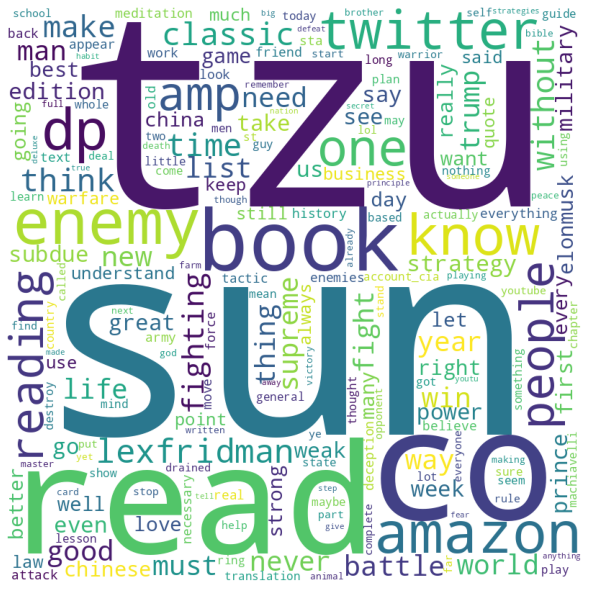

In [55]:
analyze_book_data("data/en/the_art_of_war.csv", stopwords=["art", "war"])

En plus du nom de l'auteur qui est logiquement très souvent cité, on constate que beaucoup d'utilisateurs sur Twitter font mention de notions évoquées dans le livre (gagner sans combattre, connaître son ennemi...). Il est aussi beaucoup fait mention d'Amazon DP. Après recherches, on remarque que DP est une abréviation de "Details of Product", qui est souvent utilisée dans les tweets qui font la promotion du livre sur Amazon.

Les tweets concernant ce livre sont quant à eux plutôt neutres, avec autant d'avis positifs que négatifs.

## The Song of Achilles

                    words sequences  frequencies
2014             (madeline, miller)          434
3699                  (san, marino)          272
3006                    (le, chant)          121
1715       (madeline, miller, wins)          112
4548              (prize, american)          112
2949    (american, debut, novelist)          112
5540         (novelist, ms, miller)          112
1613      (orange, prize, american)          112
1433   (artsbeat, madeline, miller)          112
2621              (american, debut)          112
324               (debut, novelist)          112
763            (artsbeat, madeline)          112
1138          (wins, orange, prize)          112
5915                (orange, prize)          112
3293                 (miller, nyti)          112
3687                 (novelist, ms)          112
756                  (wins, orange)          112
3151                 (miller, wins)          112
3760                     (nyti, ms)          112
968        (prize, a

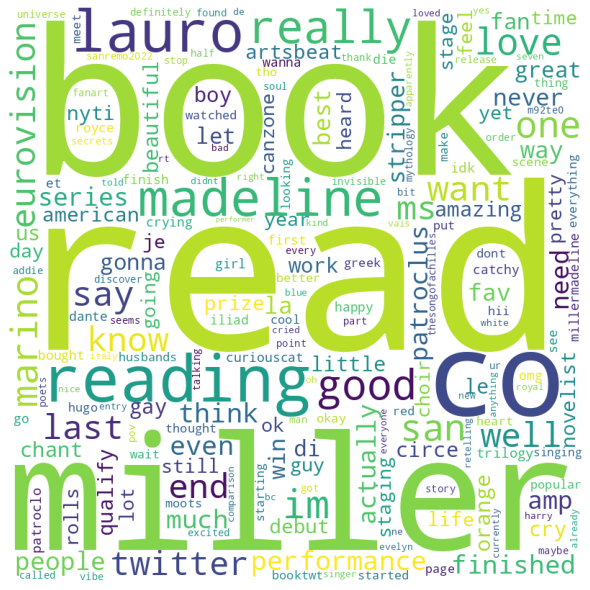

In [56]:
analyze_book_data("data/en/the_song_of_achille.csv", stopwords=["song", "achille", "achilles"])

En plus du nom de l'auteur, on remarque que beaucoup de mots (e.g. San Marino) concernent en fait des chansons d'un chanteur italien qui s'appelle aussi Achille. Dans ce cas, il serait intéressant de trouver un moyen d'identifier les tweets qui parlent du livre uniquement. Les tweets autour de ce livre sont plutôt positifs (score positif moyen à 0,17, score négatif moyen à 0,10). La grande majorité sont malgré tout neutres.

## Batman : the Dark Night Return

           words sequences  frequencies
9140         (night, part)          439
2912         (last, night)          377
12173            (part, 1)          344
19682       (night, rises)          318
31509            (part, 2)          310
32023          (year, one)          196
22732     (night, part, 1)          194
5900       (frank, miller)          167
16643      (begins, night)          162
25855     (night, part, 2)          162
2480        (night, night)          161
30                  (1, 2)          142
12909    (watching, night)          130
18588       (movie, night)          111
13391      (killing, joke)          106
16062       (vs, superman)          104
3213           (red, hood)           93
14519        (late, night)           92
11487    (animated, movie)           89
3653          (amp, robin)           88
356      (long, halloween)           87
20948    (justice, league)           87
18184    (blackest, night)           86
27843             (1, amp)           76


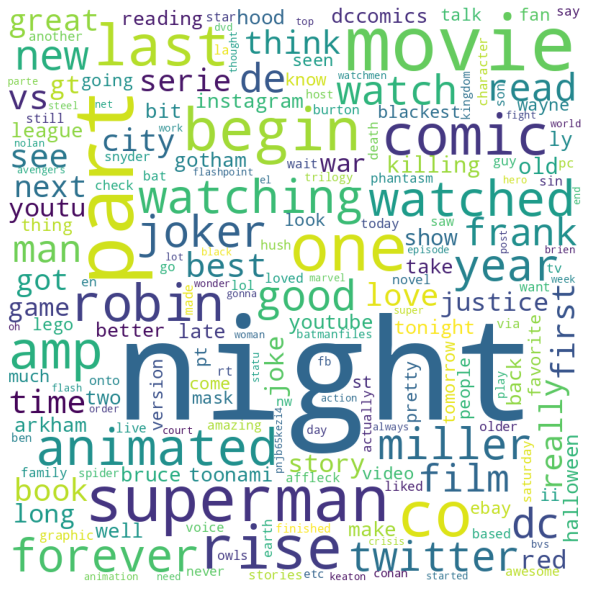

In [61]:
analyze_book_data("data/en/batman_the_dark_night_return.csv", stopwords=["batman", "dark", "knight", "return", "returns"])

Les résultats correspondent bien à ce à quoi on s'attend ici : la plupart des mots concernent des personnages de l'univers de Batman. Les tweets qui parlent de Batman sont plutôt neutres ou positifs.

## The Picture of Dorian Gray

                  words sequences  frequencies
25106              (oscar, wilde)          954
42822                (amazon, dp)          335
61292          (angela, lansbury)          168
18105           (secret, history)           79
59493                 (wilde, co)           74
72255          (oscar, wilde, co)           72
45308     (manchurian, candidate)           63
12469   (oscar, wilde, goodreads)           57
70601             (murder, wrote)           57
75186          (wilde, goodreads)           57
33162            (song, achilles)           55
78207          (pride, prejudice)           54
30724                      (0, 0)           46
68225            (coloured, moon)           45
47676            (waiting, charm)           45
4774            (honey, coloured)           45
85039                (dusky, air)           45
48176               (moon, hangs)           45
9403                 (play, come)           45
28439       (come, closer, earth)           45
58170        

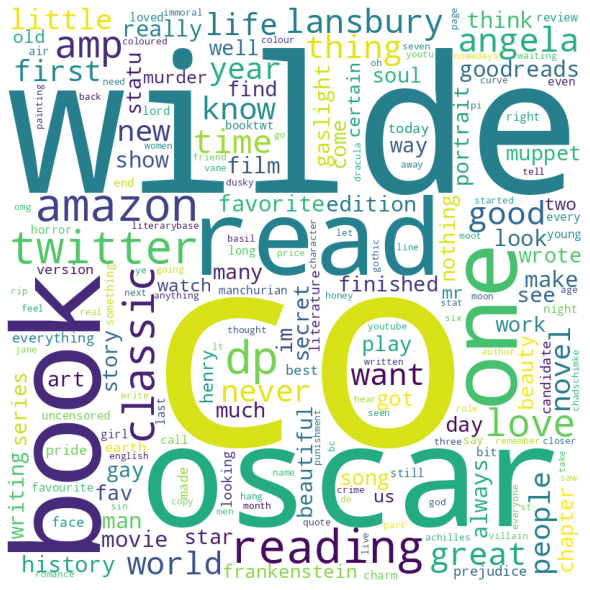

In [62]:
analyze_book_data("data/en/the_picture_of_dorian_gray.csv", stopwords=["picture", "dorian", "gray"])

On se retrouve ici confronté au même problème que pour the song of Achilles : beaucoup de résultats concernent un film basé sur le roman, et non le roman lui-même. Il pourrait être intéressant d'isoler les informations concernant le livre de celles concernant le film. Les tweets sont neutres ou positifs.

## The Book Thief

                     words sequences  frequencies
35781                (weekend, plan)         2298
37463         (weekend, plan, watch)          766
1072               (called, weekend)          766
7244                   (plan, watch)          766
19212        (called, weekend, plan)          766
21047                       (lt, gt)          765
1277                    (gt, listen)          565
63228               (lt, gt, listen)          565
58300                (markus, zusak)          550
63076               (songs, end, go)          495
25126                   (songs, end)          495
68883                      (end, go)          495
36809                  (type, movie)          472
44845                  (read, named)          472
63050                  (movie, read)          472
8754            (movie, read, named)          472
12542            (type, movie, read)          472
62068                    (named, lt)          471
61901              (read, named, lt)          471


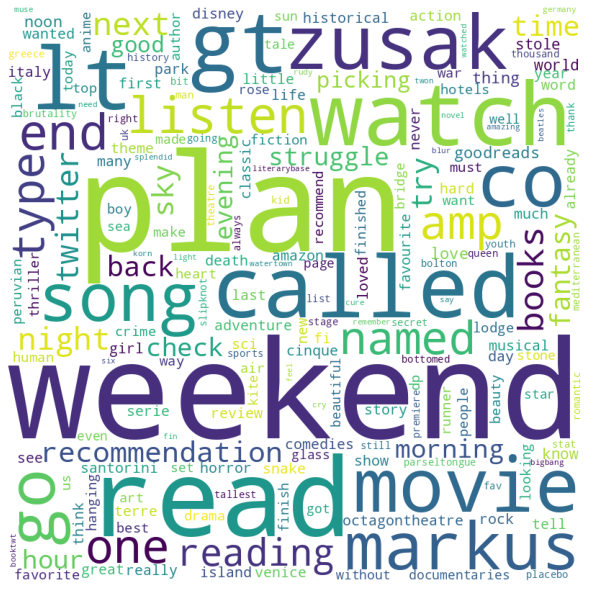

In [59]:
analyze_book_data("data/en/the_book_thief.csv", stopwords=["book", "thief"])

Ici encore, les résultats les plus fréquents concernent un film basé sur le livre, et non le livre lui-même. Là aussi, les tweets sont plutôt neutres.

Globalement, beaucoup de ces livres souffrent du même problème : les informations les concernant sont mélangées à des informations concernant des films du même nom, et il est difficile de les différencier.

## Pour aller plus loin avec l'analyse de sentiments

Pour expérimenter, réalisons une analyse sur des tweets autour de sujets très polarisants pour voir comment les résultats de l'analyse de sentiments change.

                             words sequences  frequencies
43139                              (bit, ly)         3463
649                            (cancer, bit)         3438
39966                      (cancer, bit, ly)         3436
31940                 (socializing, present)         3433
36173                (solitude, socializing)         3433
46                        (probably, cancer)         3433
4752                 (probably, cancer, bit)         3433
3935                       (bit, ly, yk3b9m)         3433
27946       (solitude, socializing, present)         3433
8051                     (present, probably)         3433
22239       (socializing, present, probably)         3433
38954                           (ly, yk3b9m)         3433
28087            (present, probably, cancer)         3433
15091                     (yk3b9m, solitude)         3268
36115        (yk3b9m, solitude, socializing)         3268
12571                 (ly, yk3b9m, solitude)         3268
43733         

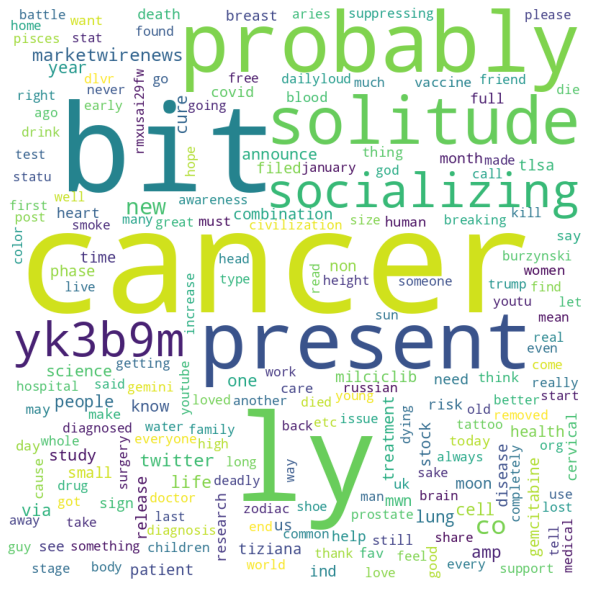

In [63]:
analyze_book_data("data/en/cancer.csv", stopwords=[])

                                 words sequences  frequencies
29552                          (happiness, jane)          335
7102                                 (new, year)          266
13752                       (darlentina, misery)          179
66751                        (misery, happiness)          172
67264                  (misery, happiness, jane)          171
85922            (darlentina, misery, happiness)          171
55194              (happiness, jane, janedeleon)          169
77268                         (jane, janedeleon)          169
59689                          (jane, janenella)          165
105663              (happiness, jane, janenella)          165
74349                          (happy, birthday)          162
73805                            (happiness, co)          127
92244                    (janenella, darlentina)          124
65358                             (good, health)          113
64592                        (health, happiness)          113
43746   

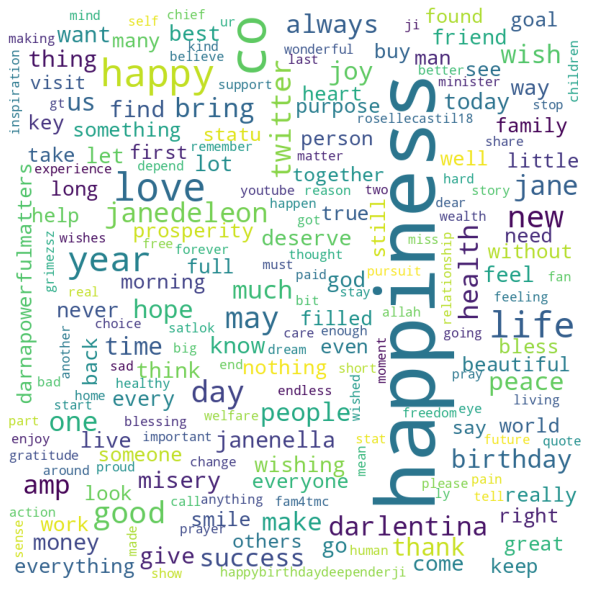

In [64]:
analyze_book_data("data/en/happiness.csv", stopwords=[])

                         words sequences  frequencies
134466                       (covid, 19)          762
77224                   (covid, vaccine)          263
122285                      (got, covid)          128
112158                     (long, covid)          128
40285                  (covid, vaccines)          125
64304                         (2023, 01)          111
74992                     (china, covid)           78
1560                      (19, vaccines)           69
105244                     (died, covid)           69
24216              (covid, 19, vaccines)           69
141022                      (flu, covid)           68
16340                       (covid, vax)           59
50911           (theepochtimes, mkt_app)           59
80415                      (covid, shot)           58
84400                   (getting, covid)           56
103178                      (new, covid)           55
59526                    (covid, deaths)           55
14610                  (japa

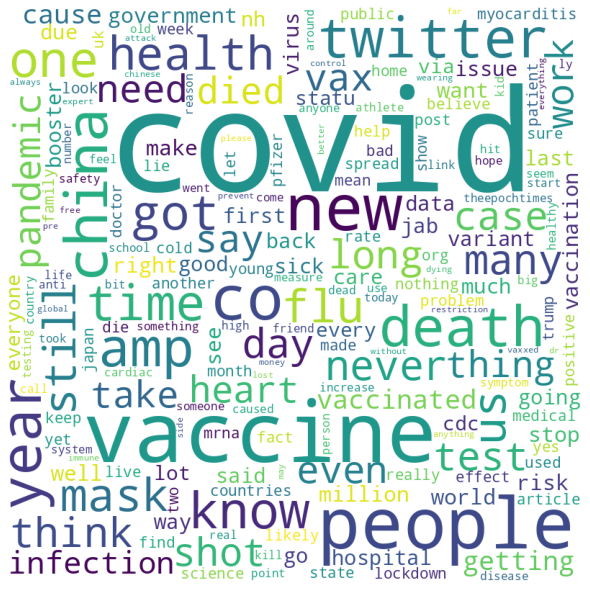

In [65]:
analyze_book_data("data/en/covid.csv", stopwords=[])

                          words sequences  frequencies
60818                     (donald, trump)         2771
39355                   (kevin, mccarthy)          235
89363                 (president, donald)          186
2599           (president, donald, trump)          184
75285                  (never, president)          155
55351                    (speaker, house)          132
25832                    (trump, speaker)          106
65305                         (trump, jr)          104
91434                 (donald, trump, jr)          101
90061            (donald, trump, speaker)           98
21345                 (former, president)           89
84727                (trump, donaldtrump)           87
49012                       (jim, jordan)           86
46977        (random, trump, randomtrump)           85
14413         (trump, donaldtrump, giphy)           85
4117                          (gif, gifs)           85
4767                      (gif, gifs, co)           85
76346   (r

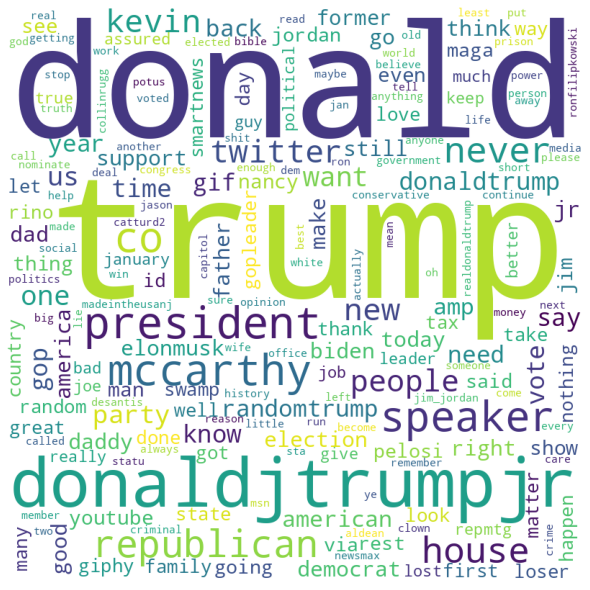

In [67]:
analyze_book_data("data/en/trump.csv", stopwords=[])

On peut tirer plusieurs conclusions de ces résultats :
- Les mots qui ont une forte conotation positie ou négative (e.g. happiness, cancer) ont aussi des scores qui sont clairement positifs ou négatifs, surtout si l'on regarde les scores composés (-0,28 pour le cancer, 0,63 pour happiness)
- Contrairement à ce que l'on pourrait penser, les sujets potentiellement polémiques (COVID, Donald Trump) n'ont pas forcément des scores polarisés (0,73 et 0,75, respectivement).